In [1]:
# Import Packages
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Import Data Files
# Predictors
# Commodity Indices

predictors = pd.read_excel('./predictors_monthly.xlsx')
commodity = pd.read_excel('./Commodities_Monthly.xlsx')

In [3]:
predictors

,date,CPURNSA Index,RR2YCUS Index,EHGDUSY Index,INDPRO,M1,M2,Bill Rate 13 week,Unemployment Rate,VIX Index,MSCI US Equity,BBDXY Index,XAU BGN Curncy,XAG BGN Curncy
0,2001-01-01,NaN,NaN,NaN,92.0304,1096.7,4975.7,NaN,4.2,NaN,NaN,NaN,NaN,NaN
1,2001-02-01,NaN,NaN,NaN,91.4079,1101.2,5014.1,NaN,4.2,NaN,NaN,NaN,NaN,NaN
2,2001-03-01,NaN,NaN,NaN,91.1751,1108.9,5072.0,NaN,4.3,NaN,NaN,NaN,NaN,NaN
3,2001-04-01,NaN,NaN,NaN,90.8767,1116.7,5135.9,NaN,4.4,NaN,NaN,NaN,NaN,NaN
4,2001-05-01,NaN,NaN,NaN,90.3750,1118.5,5133.0,NaN,4.3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2022-04-01,289.109,-3.637619,5.9,104.2577,20615.3,21655.6,0.06,3.6,24.373500,478.583000,1216.540500,1937.504762,24.577876
256,2022-05-01,292.296,-3.418182,5.9,104.1868,20620.8,21684.5,0.06,3.6,29.313636,412.773810,1242.369091,1848.476364,21.882845
257,2022-06-01,296.311,-2.916818,5.9,104.1778,20545.0,21667.3,0.06,3.6,28.233182,416.818571,1250.808182,1837.196364,21.520232
258,2022-07-01,296.276,-2.880952,5.9,104.7189,20516.0,21709.6,0.06,3.5,24.995238,434.002000,1279.920952,1736.971905,19.112052


In [4]:
commodity

,Year_Month,Agriculture_Spot,Energy_Spot,Grains_Spot,Industrial_Metals_Spot,Livestock_Spot,Precious_Metals_Spot
0,2001_12,98.295500,111.162900,108.652200,68.848400,108.603300,83.327600
1,2002_1,100.736467,109.677795,109.931548,71.832452,112.374390,83.484790
2,2002_2,98.770132,115.558084,111.944895,72.647295,115.442500,86.362305
3,2002_3,102.399535,141.132075,121.682270,75.491090,111.282110,86.608515
4,2002_4,101.901882,151.912018,124.062245,74.955100,100.286527,88.764459
...,...,...,...,...,...,...,...
244,2022_4,504.394335,567.135295,644.463265,367.461420,219.437445,562.850785
245,2022_5,508.215676,630.529705,651.196038,323.461643,209.311657,528.029933
246,2022_6,472.593681,638.126038,635.588514,304.422452,211.310857,523.682552
247,2022_7,408.583170,567.188905,565.536940,260.073770,210.121025,488.226990


In [5]:
commodity.keys()

Index(['Year_Month', 'Agriculture_Spot', 'Energy_Spot', 'Grains_Spot',
       'Industrial_Metals_Spot', 'Livestock_Spot', 'Precious_Metals_Spot'],
      dtype='object')

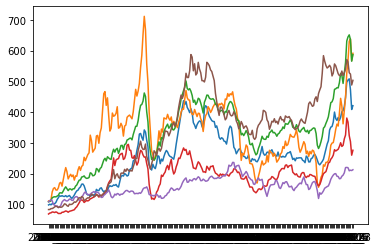

In [6]:
for key in commodity.keys()[1:]:
    plt.plot(commodity['Year_Month'],commodity[key])

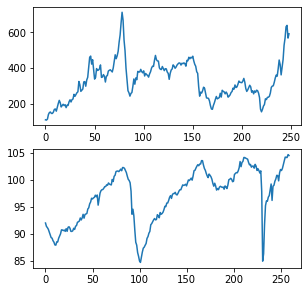

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(4.8, 4.8))

axes[0].plot(commodity['Energy_Spot'])
axes[1].plot(predictors['INDPRO'])

(array([14., 30., 56., 40., 58., 36.,  4.,  5.,  3.,  3.]),
 array([109.67779524, 169.84727762, 230.01676   , 290.18624238,
        350.35572476, 410.52520714, 470.69468952, 530.8641719 ,
        591.03365429, 651.20313667, 711.37261905]),
 <BarContainer object of 10 artists>)

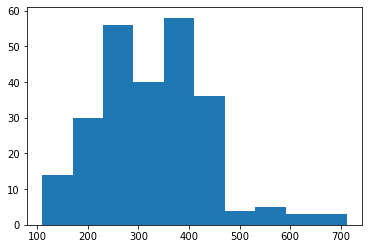

In [38]:
# fig, axes = plt.subplots(6, 1, figsize=(4.8, 4.8))

# for i in range(6):
#     axes[i].hist(commodity[commodity.keys()[i]])

plt.hist(commodity['Energy_Spot'])

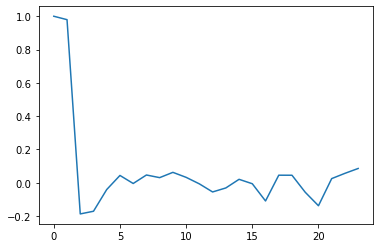

In [97]:
# pacf=sm.tsa.stattools.pacf(commodity['Agriculture_Spot'])
# plt.plot(pacf)

### Extracting Lags

['Agriculture_Spot', 'Energy_Spot', 'Grains_Spot', 'Industrial_Metals_Spot', 'Livestock_Spot', 'Precious_Metals_Spot']

In [105]:
# Identify Signficant Predictors and corresponding lags

# corr = signal.correlate(predictors['INDPRO'],commodity['Energy_Spot'])
# corr /= np.max(corr)
# plt.plot(corr)

lags_indpro=[]

for comm in commodity.keys()[1:]:

    ccf=sm.tsa.stattools.ccf(predictors['INDPRO'][11:],commodity[comm],adjusted=False)
#     plt.plot(ccf)
    lags_indpro=lags_indpro+[np.argmax(ccf)]

lags_indpro

[81, 85, 0, 1, 0, 81]

In [106]:
# Identify Signficant Predictors and corresponding lags

lags_m1=[]

for comm in commodity.keys()[1:]:

    ccf=sm.tsa.stattools.ccf(predictors['M1'][11:],commodity[comm],adjusted=False)
#     plt.plot(ccf)
    lags_m1=lags_m1+[np.argmax(ccf)]

lags_m1

[113, 166, 0, 0, 85, 0]

In [107]:
lags_m2=[]

for comm in commodity.keys()[1:]:

    ccf=sm.tsa.stattools.ccf(predictors['M2'][11:],commodity[comm],adjusted=False)
#     plt.plot(ccf)
    lags_m2=lags_m2+[np.argmax(ccf)]

lags_m2

[0, 95, 0, 0, 0, 0]

In [108]:
lags_unemp=[]

for comm in commodity.keys()[1:]:

    ccf=sm.tsa.stattools.ccf(predictors['Unemployment Rate'][11:],commodity[comm],adjusted=False)
#     plt.plot(ccf)
    lags_unemp=lags_unemp+[np.argmax(ccf)]

lags_unemp

[148, 23, 156, 30, 157, 159]

Lags are too large and cannot be used directly

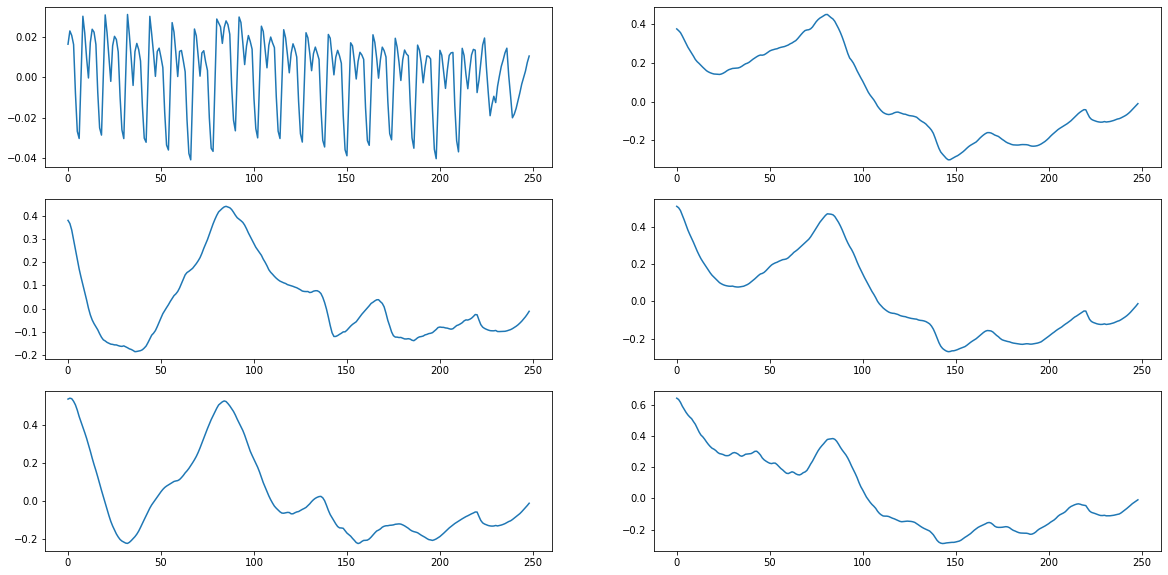

In [88]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))

for i in range(3):
    for j in range(2):
        axes[i][j].plot(sm.tsa.stattools.ccf(predictors['INDPRO'][11:],commodity[commodity.keys()[2*i+j]],adjusted=False))


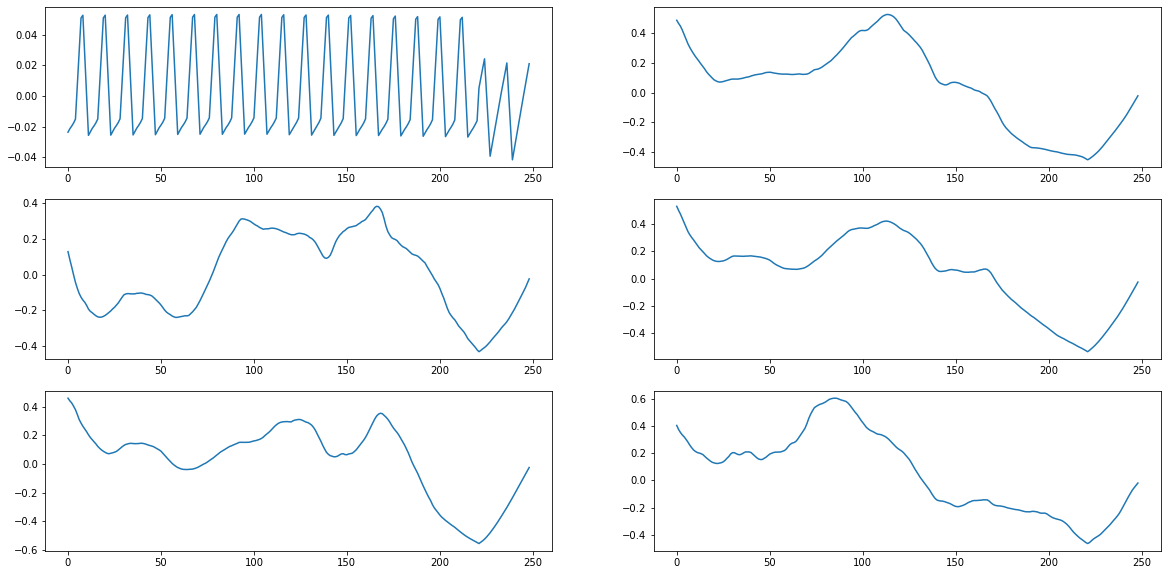

In [89]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))

for i in range(3):
    for j in range(2):
        axes[i][j].plot(sm.tsa.stattools.ccf(predictors['M1'][11:],commodity[commodity.keys()[2*i+j]],adjusted=False))


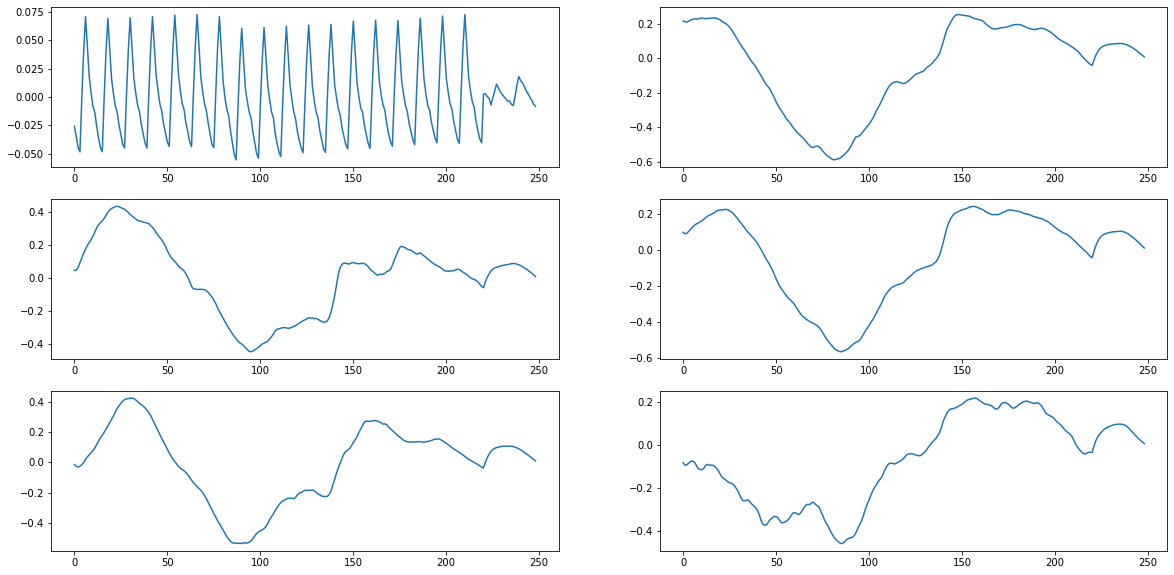

In [91]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))

for i in range(3):
    for j in range(2):
        axes[i][j].plot(sm.tsa.stattools.ccf(predictors['Unemployment Rate'][11:],commodity[commodity.keys()[2*i+j]],adjusted=False))


In [16]:
from sklearn.linear_model import LinearRegression

In [131]:
# Energy with Unemployment, Lag = 23

unemployment = np.array(predictors['Unemployment Rate'][11:-23]).reshape(-1,1)
energy = np.array(commodity['Energy_Spot'][23:]).reshape(-1,1)

model = LinearRegression()

model.fit(unemployment,energy)

model.score(unemployment,energy)

0.15229937814344474

In [132]:
# Industrial Metals with Unemployment, Lag = 30

unemployment = np.array(predictors['Unemployment Rate'][11:-30]).reshape(-1,1)
ind_metals = np.array(commodity['Industrial_Metals_Spot'][30:]).reshape(-1,1)

model = LinearRegression()

model.fit(unemployment,ind_metals)

model.score(unemployment,ind_metals)


0.03714632638159754

Even training R2 are hopeless

### Autocorrelation & Partial Autocorrelation

[11, 0, 0, 0, 0, 0]

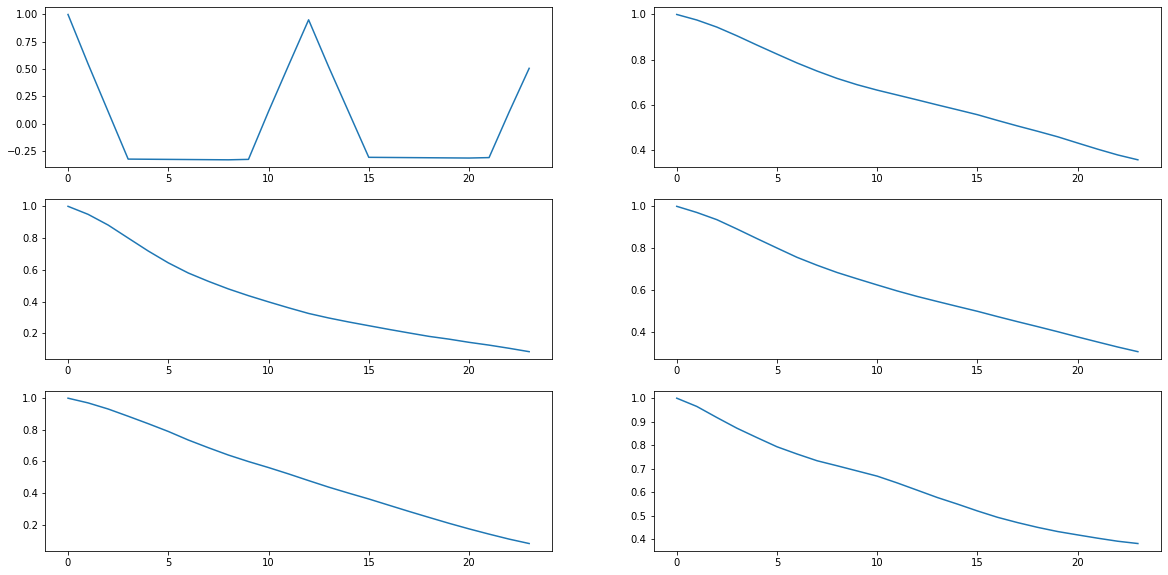

In [13]:
lags_acf=[]

fig, axes = plt.subplots(3, 2, figsize=(20, 10))

for i in range(3):
    for j in range(2):
        acf=sm.tsa.stattools.acf(commodity[commodity.keys()[2*i+j]])
        lags_acf=lags_acf+[np.argmax(acf[1:])]
        axes[i][j].plot(acf)

lags_acf

[12, 0, 0, 0, 0, 0]

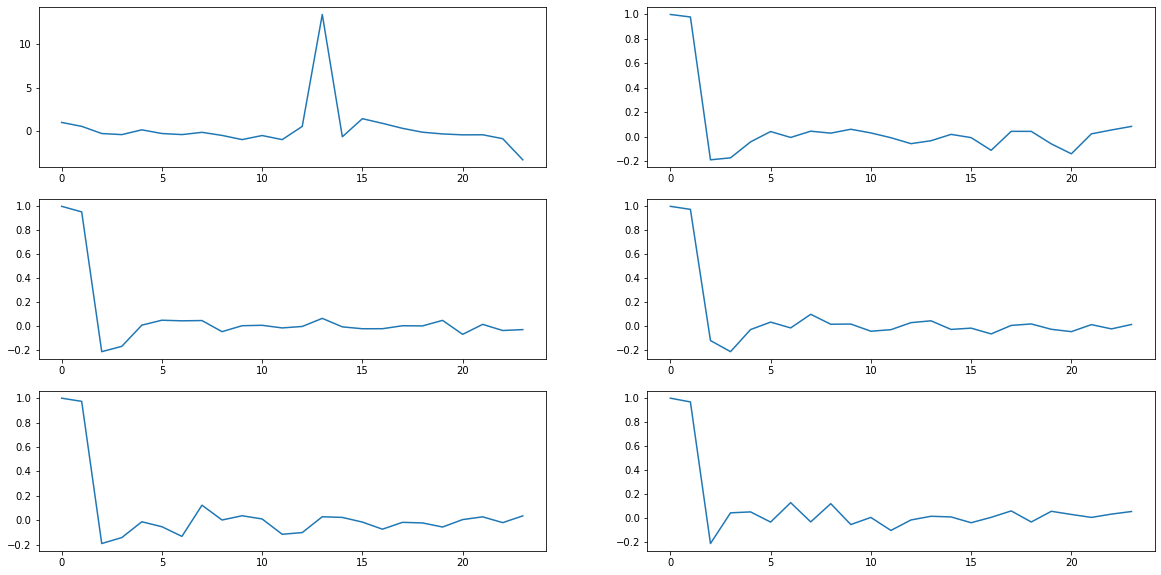

In [14]:
lags_pacf=[]

fig, axes = plt.subplots(3, 2, figsize=(20, 10))

for i in range(3):
    for j in range(2):
        pacf=sm.tsa.stattools.pacf(commodity[commodity.keys()[2*i+j]])
        lags_pacf=lags_pacf+[np.argmax(pacf[1:])]
        axes[i][j].plot(pacf)

lags_pacf

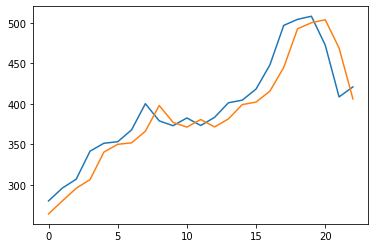

In [73]:
# Agriculture Spot, Lag = 12

agri_x = np.array(commodity['Agriculture_Spot'][:-1]).reshape(-1,1)
agri_y = np.array(commodity['Agriculture_Spot'][1:]).reshape(-1,1)

n=len(agri_y)

agri_xtrain = agri_x[:-24]
agri_ytrain = agri_y[:-24]

agri_xtest = agri_x[n-23:]
agri_ytest= agri_y[n-23:]

model = LinearRegression()

model.fit(agri_xtrain,agri_ytrain)

model.score(agri_xtest,agri_ytest)

predict=model.predict(agri_xtest)

plt.plot(agri_ytest)
plt.plot(predict)

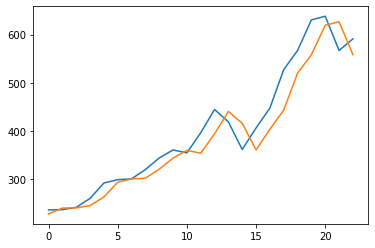

In [72]:
# Energy Spot, Lag = 1

energy_x = np.array(commodity['Energy_Spot'][:-1]).reshape(-1,1)
energy_y = np.array(commodity['Energy_Spot'][1:]).reshape(-1,1)

n=len(energy_y)

energy_xtrain = energy_x[:-24]
energy_ytrain = energy_y[:-24]

energy_xtest = energy_x[n-23:]
energy_ytest= energy_y[n-23:]

model = LinearRegression()

model.fit(energy_xtrain,energy_ytrain)

model.score(energy_xtest,energy_ytest)

predict=model.predict(energy_xtest)

plt.plot(energy_ytest)
plt.plot(predict)

In [63]:
# Commodity Spot, Lag = k

k=1

for comm in commodity.keys()[1:]:

    X = np.array(commodity[comm][:-k]).reshape(-1,1)
    Y = np.array(commodity[comm][k:]).reshape(-1,1)
    
    n=len(Y)

    xtrain = X[:-24]
    ytrain = Y[:-24]

    xtest = X[n-23:]
    ytest= Y[n-23:]

    model = LinearRegression()

    model.fit(xtrain,ytrain)

    print(model.score(xtest,ytest))

0.8402767615963496
0.908724636814687
0.8911550347608982
0.7572762715181461
0.8647199782301329
0.14866754843858765


In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [77]:
additive_decomposition = seasonal_decompose(commodity['Agriculture_Spot'], model='additive', period=12)

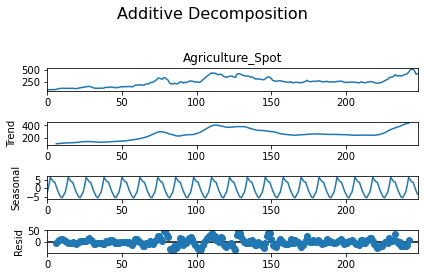

In [78]:
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [79]:
additive_decomposition = seasonal_decompose(commodity['Energy_Spot'], model='additive', period=12)

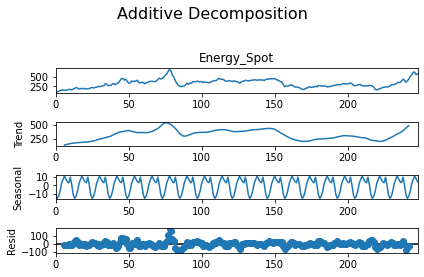

In [80]:
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [81]:
from statsmodels.tsa.arima_model import ARIMA